In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler


C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# load dataset breast cancer

data = load_breast_cancer()
bc = pd.DataFrame(data=load_breast_cancer().data, columns=load_breast_cancer().feature_names)
bc['target'] = load_breast_cancer().target

bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


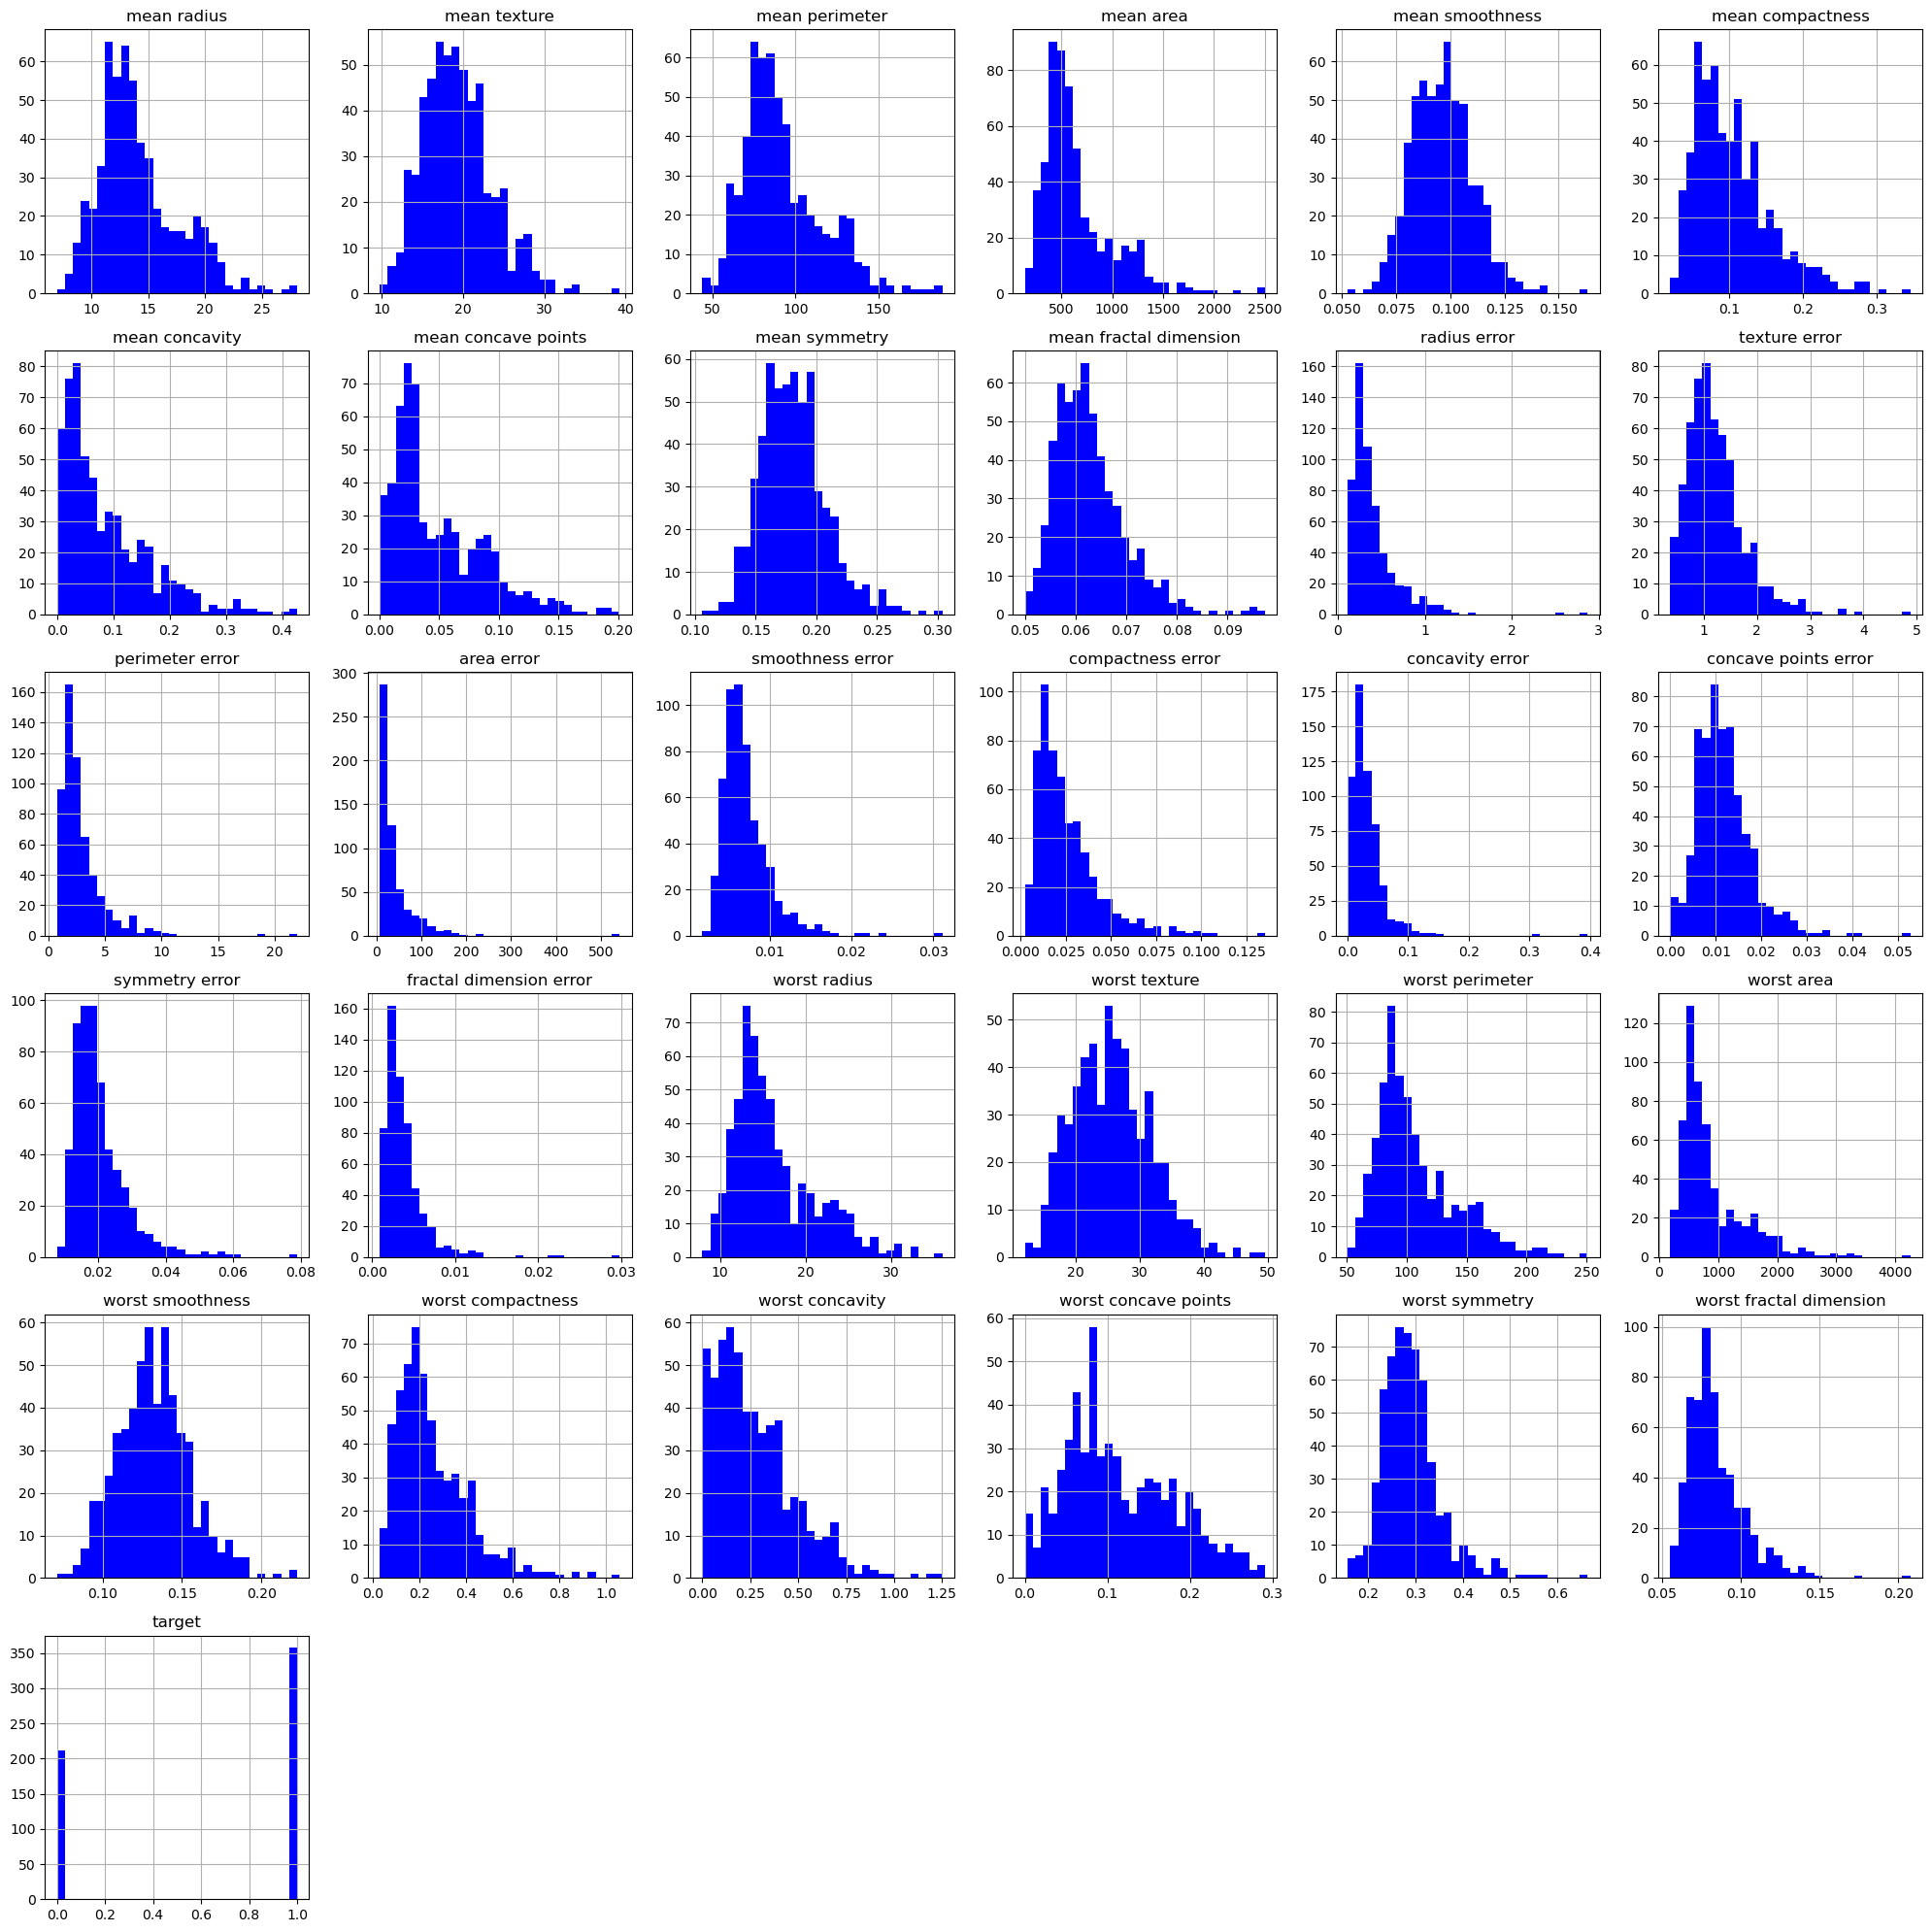

In [3]:
# Visualize the data
bc.hist(bins=30, figsize=(20,20), color='blue')
plt.tight_layout()
plt.show()

In [4]:
# Check missing values
na_count = bc.isna().sum()
na_count

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
# Data Cleaning - Handle missing values
bc.fillna(bc.mean(), inplace=True)

print("Dataframe After Handling Missing Values:")
bc.head()

Dataframe After Handling Missing Values:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
bc = pd.DataFrame(data=load_breast_cancer().data, columns=load_breast_cancer().feature_names)
bc['target'] = load_breast_cancer().target

# Data Transformation - Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
bc_scaled = scaler.fit_transform(bc[bc.columns[:-1]]) #Transform all columns except the target column.

# Convert the scaled features back to a dataframe
bc_scaled = pd.DataFrame(data=bc_scaled, columns=bc.columns[:-1])
bc_scaled['target'] = bc['target']
bc_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


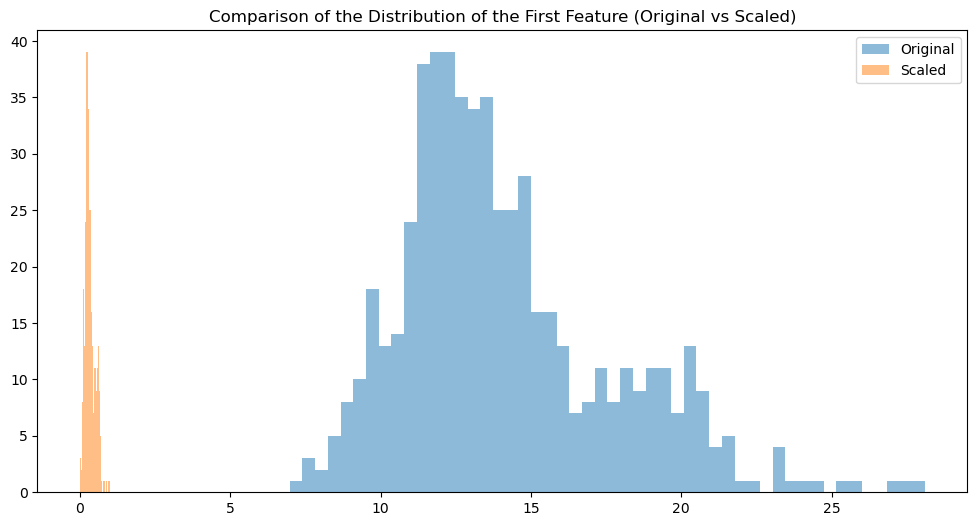

In [7]:
# Plot the histogram of the first feature of the original data and the scaled data
plt.figure(figsize=(12,6))
plt.title("Comparison of the Distribution of the First Feature (Original vs Scaled)")
plt.hist(bc[bc.columns[0]], bins=50, label='Original', alpha=0.5)
plt.hist(bc_scaled[bc_scaled.columns[0]], bins=50, label='Scaled', alpha=0.5)
plt.legend()
plt.show()

In [8]:
# Data Splitting - Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(bc.drop('target', axis=1), 
                                                                    bc['target'], test_size=0.2, random_state=42)
'''
random_state=42 sets the random number generator seed for the train_test_split function to 42. 
This means that every time the code is run, the same random samples will be selected for the training and test datasets.
If you don't want to fix random state should not add random_state to parameter 
If you want random by shuffle, You can set parameter like "shuffle=True"
'''



# Print the number of records in each dataset
print("Number of records in the training data:", train_data.shape[0])
print("Number of records in the test data:", test_data.shape[0])

# Print the count of each class in each dataset
print("\nClass distribution in the training data:")
print(train_labels.value_counts(normalize=True))

print("\nClass distribution in the test data:")
print(test_labels.value_counts(normalize=True))

Number of records in the training data: 455
Number of records in the test data: 114

Class distribution in the training data:
1    0.628571
0    0.371429
Name: target, dtype: float64

Class distribution in the test data:
1    0.622807
0    0.377193
Name: target, dtype: float64


In [9]:
# Check the normality of the first feature of the training data 
#(if p-value less than a significance level (e.g., 0.05), 
#you can reject the null hypothesis that the data is normally distributed)

stat, p = shapiro(train_data[train_data.columns[0]])
#print("Shapiro-Wilk test statistic for the first feature of the training data:", stat)
print("p-value for the first feature of the training data:", p)

# Check the normality of the first feature of the test data
stat, p = shapiro(test_data[test_data.columns[0]])
#print("Shapiro-Wilk test statistic for the first feature of the test data:", stat)
print("p-value for the first feature of the test data:", p)

p-value for the first feature of the training data: 6.908993234293337e-13
p-value for the first feature of the test data: 0.00021486746845766902


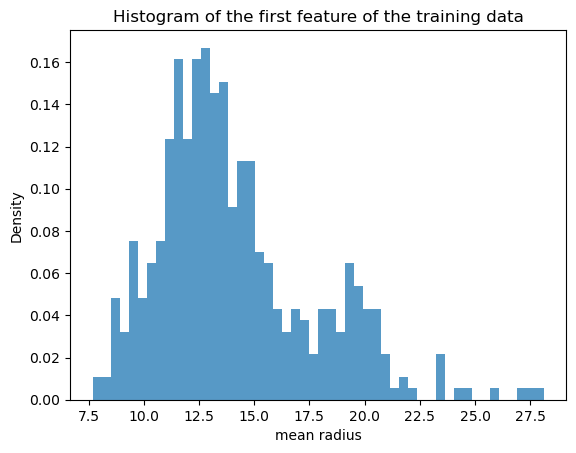

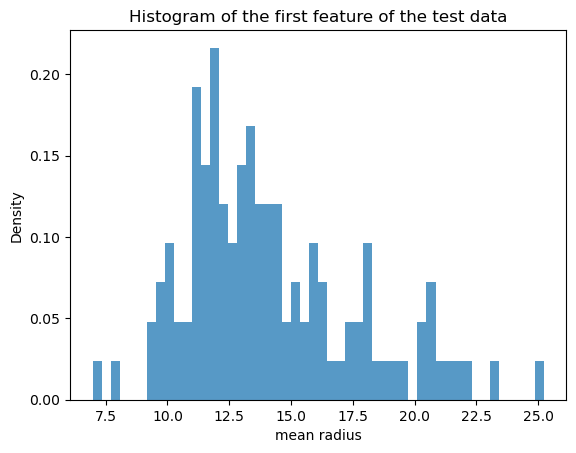

In [10]:
# Create a histogram plot for the first feature of the training data
plt.hist(train_data[train_data.columns[0]], bins=50, density=True, alpha=0.75)
plt.xlabel(train_data.columns[0])
plt.ylabel('Density')
plt.title('Histogram of the first feature of the training data')
plt.show()

# Create a histogram plot for the first feature of the test data
plt.hist(test_data[test_data.columns[0]], bins=50, density=True, alpha=0.75)
plt.xlabel(test_data.columns[0])
plt.ylabel('Density')
plt.title('Histogram of the first feature of the test data')
plt.show()

In [11]:
#Data Sampling - Handle imbalanced classes using oversampling
# If data get in problem of imbalance dataset should consider this step to sampling the data
#oversample = RandomOverSampler(sampling_strategy='minority')
#train_data, train_labels = oversample.fit_resample(train_data, train_labels)

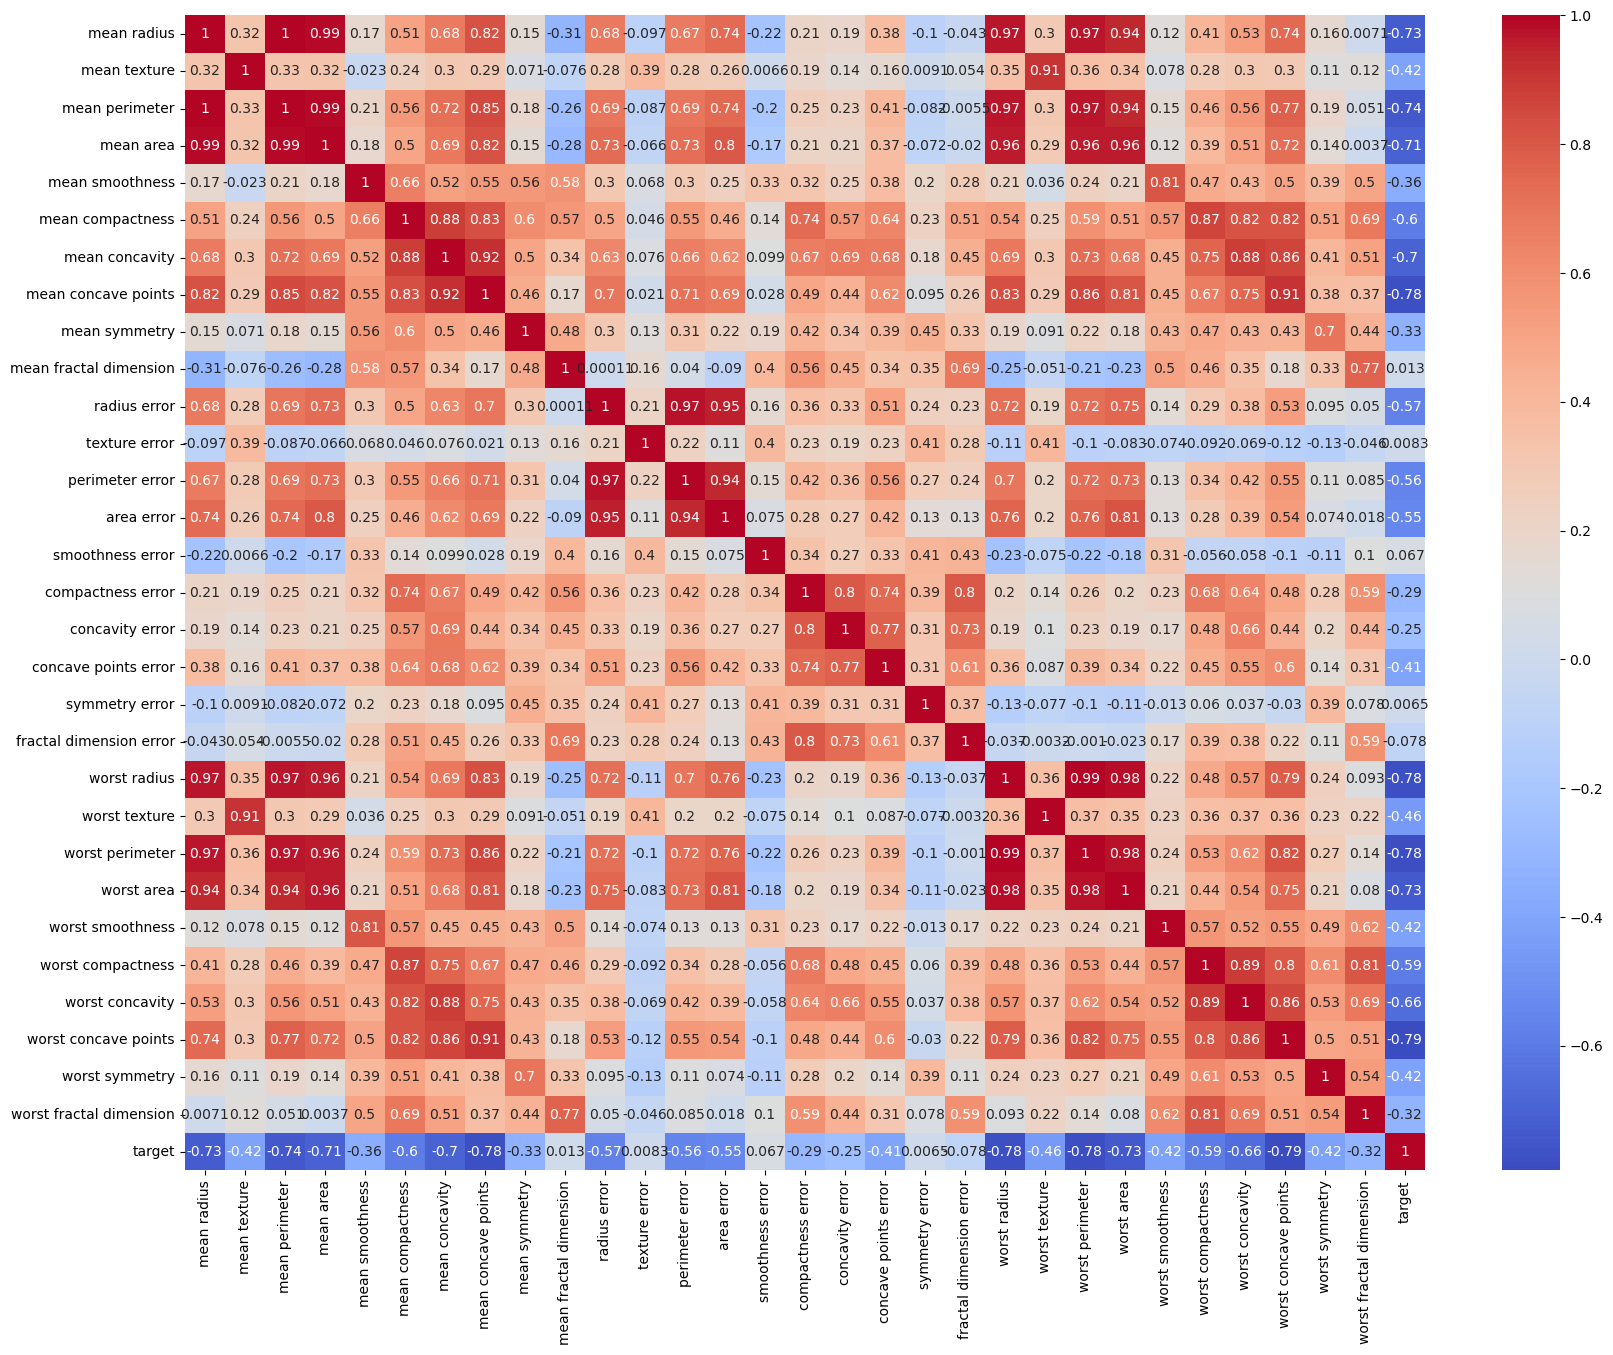

In [12]:
# Compute the correlation matrix
corr = bc.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Select the most important features using SelectKBest

'''
The features selected by the SelectKBest object are based on the F-test score, 
which measures the relation between the feature and the target variable. 
The F-test score is used to select the k features with the highest score, 
where k is the number of features specified by the k argument in the SelectKBest object.

In this example, the SelectKBest object was used to select the 5 features with the highest F-test score. 
The 5 selected features are mean perimeter, mean concave points, worst radius, worst perimeter, and worst concave points. 
These features were selected because they have the highest relation to the target variable, according to the F-test score.
'''

selector = SelectKBest(f_classif, k=5)
selector.fit(train_data, train_labels)
train_data = selector.transform(train_data)
test_data = selector.transform(test_data)

# Create a list of feature names
feature_names = bc.columns[:-1]

# Print the names of the selected features
selected_features_indices = selector.get_support(indices=True)
print("Selected Features:", [feature_names[i] for i in selected_features_indices])

Selected Features: ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']


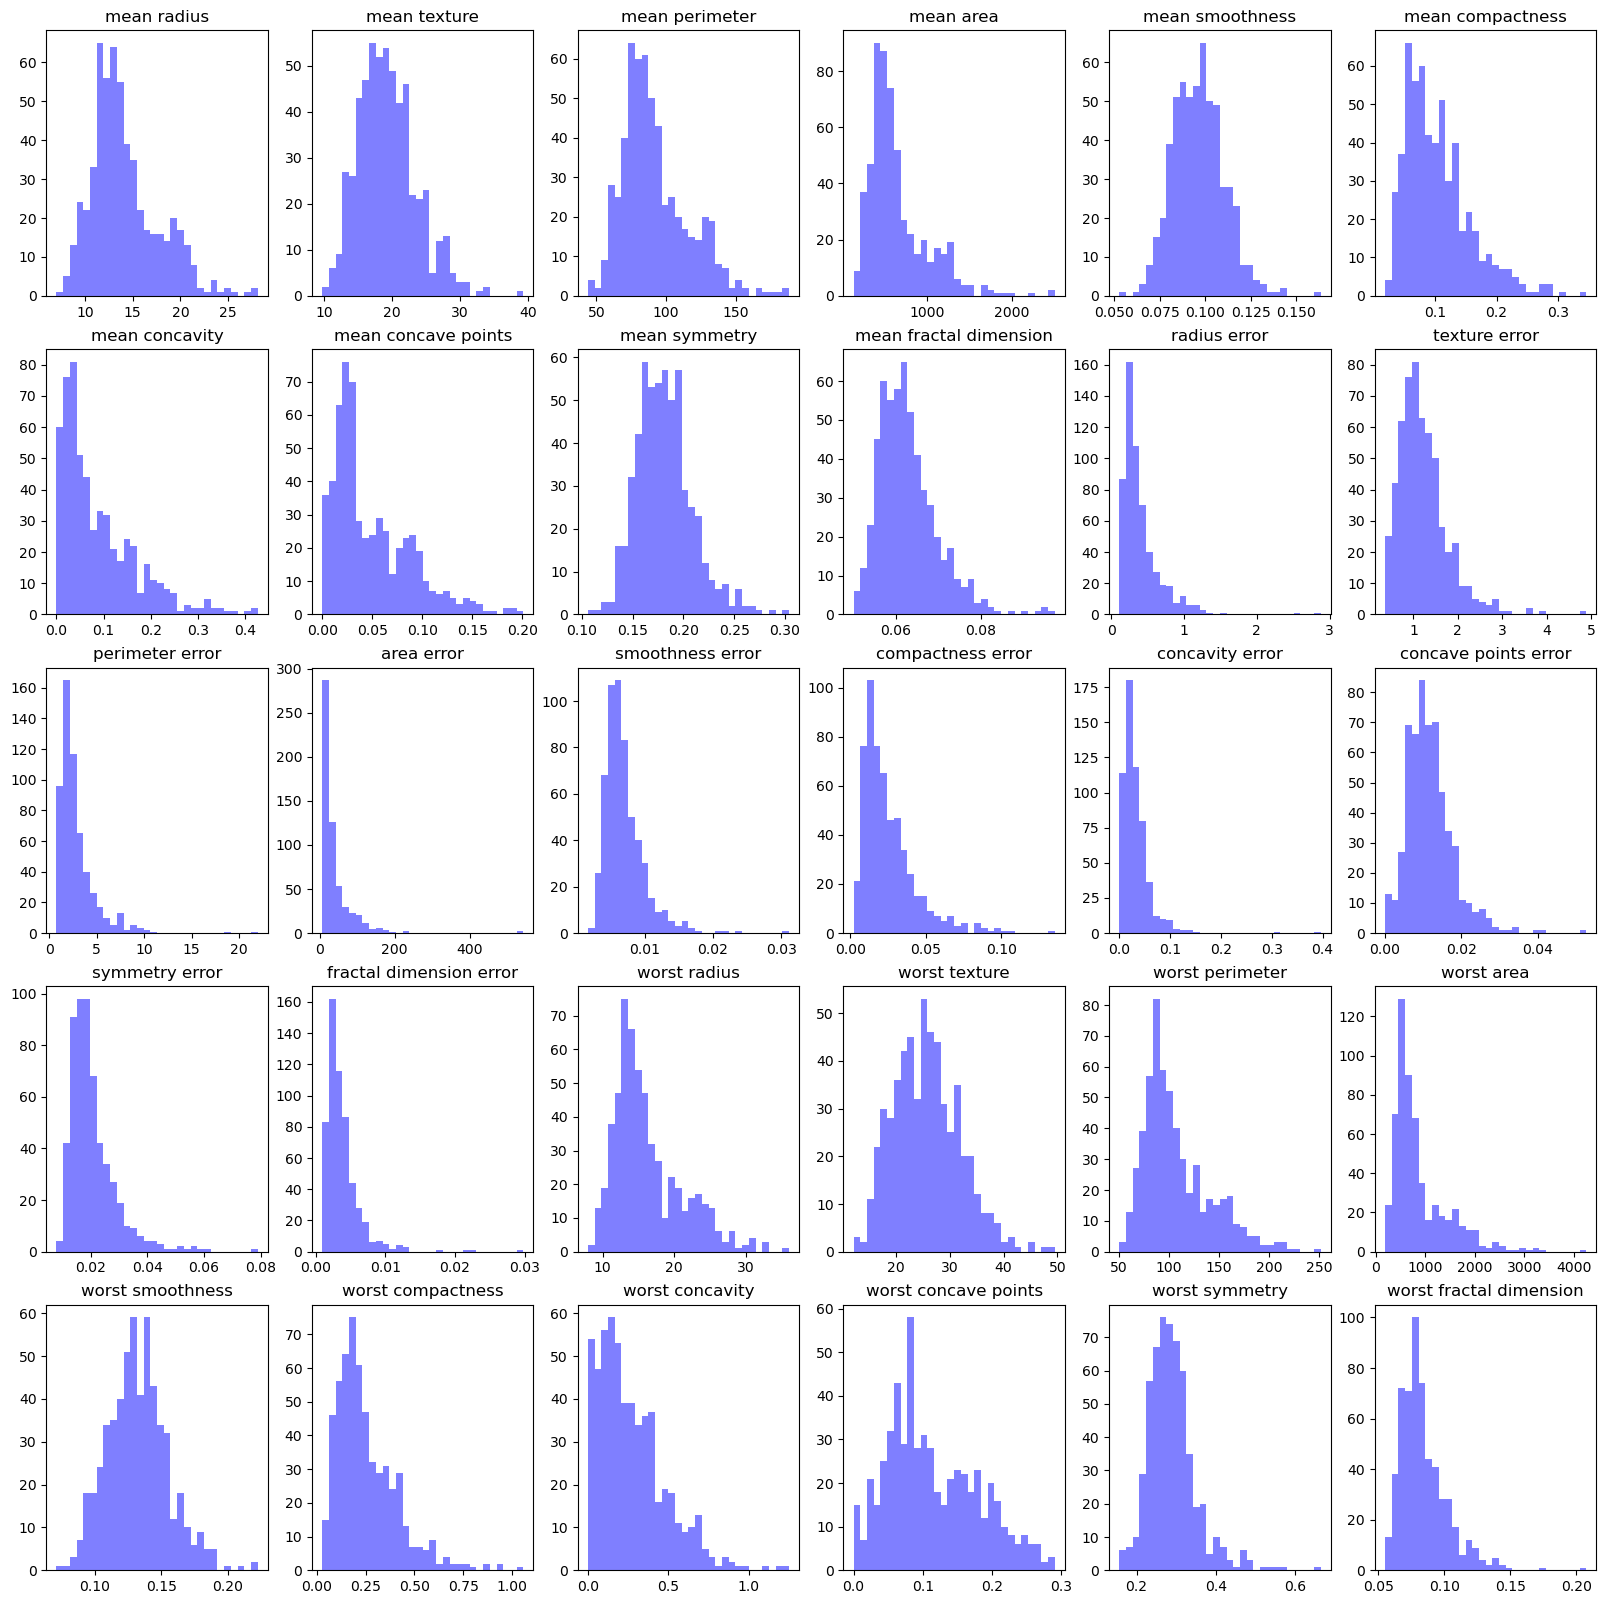

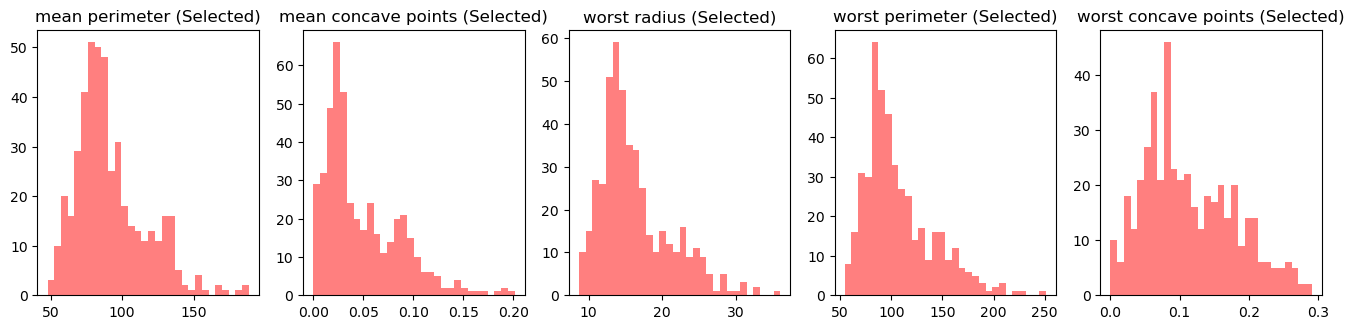

In [14]:
# Plot histograms of the original features
plt.figure(figsize=(20, 20))
for i in range(len(feature_names)):
    plt.subplot(5, 6, i+1)
    plt.hist(bc[feature_names[i]], bins=30, color='blue', alpha=0.5)
    plt.title(feature_names[i])

# Plot histograms of the selected features
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(5, 6, i+1)
    plt.hist(train_data[:, i], bins=30, color='red', alpha=0.5)
    plt.title(feature_names[selected_features_indices[i]] + " (Selected)")

plt.show()